In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
sns.set()
data1= pd.read_csv('EmployeeAttrition.csv')
data1= data1[['Attrition','Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
data1= data1.drop(['Over18'],axis=1)
df= data1.copy()
pd.options.display.max_columns = None
data1.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
Attrition                   1470 non-null object
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

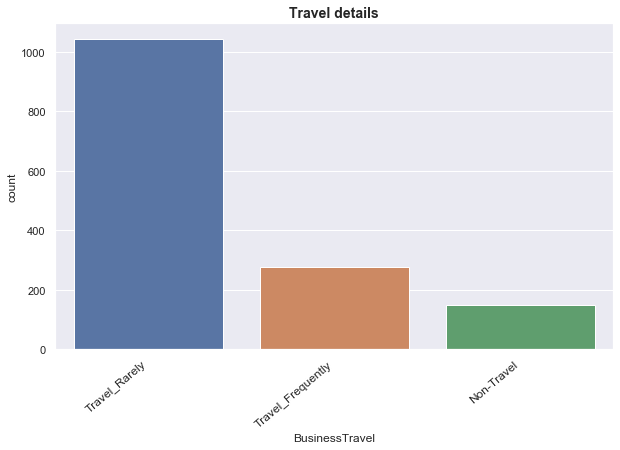

In [3]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='BusinessTravel', data=data1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.title('Travel details', fontsize=14, fontweight='bold')
plt.show()

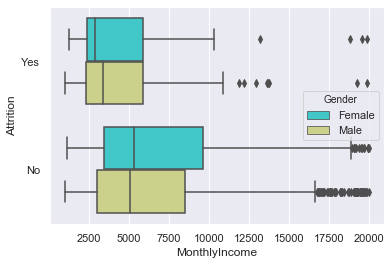

In [4]:
sns.boxplot(x="MonthlyIncome", y="Attrition", hue="Gender",data=data1, palette="rainbow")
#employees with comparitively more monthly income, tend to stay.


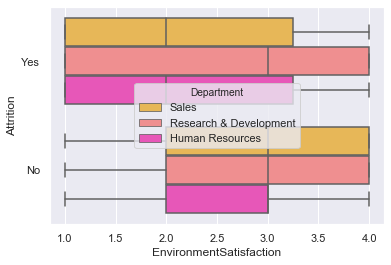

In [5]:

sns.boxplot(x="EnvironmentSatisfaction", y="Attrition", hue="Department",data=data1, palette="spring_r")
#employees with less environment satisfaction tend to leave more.

In [6]:

df['Attrition']= df.Attrition.map({'Yes':1,'No':0})
df['BusinessTravel']= df.BusinessTravel.map({'Travel_Rarely':2,'Travel_Frequently':3,'Non-Travel':1})
df['Department']= df.Department.map({'Research & Development':1,'Sales':2,'Human Resources':3})
df['EducationField']= df.EducationField.map({'Life Sciences':1,'Other':2,'Medical':3,'Marketing':4,'Technical Degree':5,'Human Resources':6})
df['Gender']= df.Gender.map({'Female':1,'Male':0})
df['JobRole']= df.JobRole.map({'Sales Executive':1,'Research Scientist':2,'Laboratory Technician':3,
                              'Manufacturing Director':4,'Healthcare Representative':5,'Manager':6,'Sales Representative':7,
                               'Research Director':8,'Human Resources':9})
df['MaritalStatus']= df.MaritalStatus.map({'Single':1,'Married':2,'Divorced':3})
df['OverTime']= df.OverTime.map({'Yes':1,'No':0})


In [7]:
#chi2 testing to select relevant features
#reduce the dimension of the dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X= df.iloc[:,1:36]
y= df.iloc[:,0:1]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                   Specs          Score
17         MonthlyIncome  127922.293694
18           MonthlyRate    1196.633553
2              DailyRate     956.580494
26     TotalWorkingYears     230.721618
29        YearsAtCompany     142.100054
30    YearsInCurrentRole     117.522596
32  YearsWithCurrManager     110.671534
0                    Age      84.155277
20              OverTime      63.845067
4       DistanceFromHome      63.772142


Text(0, 0.5, 'Monthly salary')

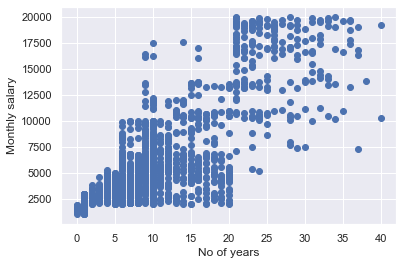

In [8]:
plt.scatter(df['TotalWorkingYears'],df['MonthlyIncome'])
plt.xlabel("No of years")
plt.ylabel("Monthly salary")
#we can see a little linear relationship between the both
#clustering will be helpful

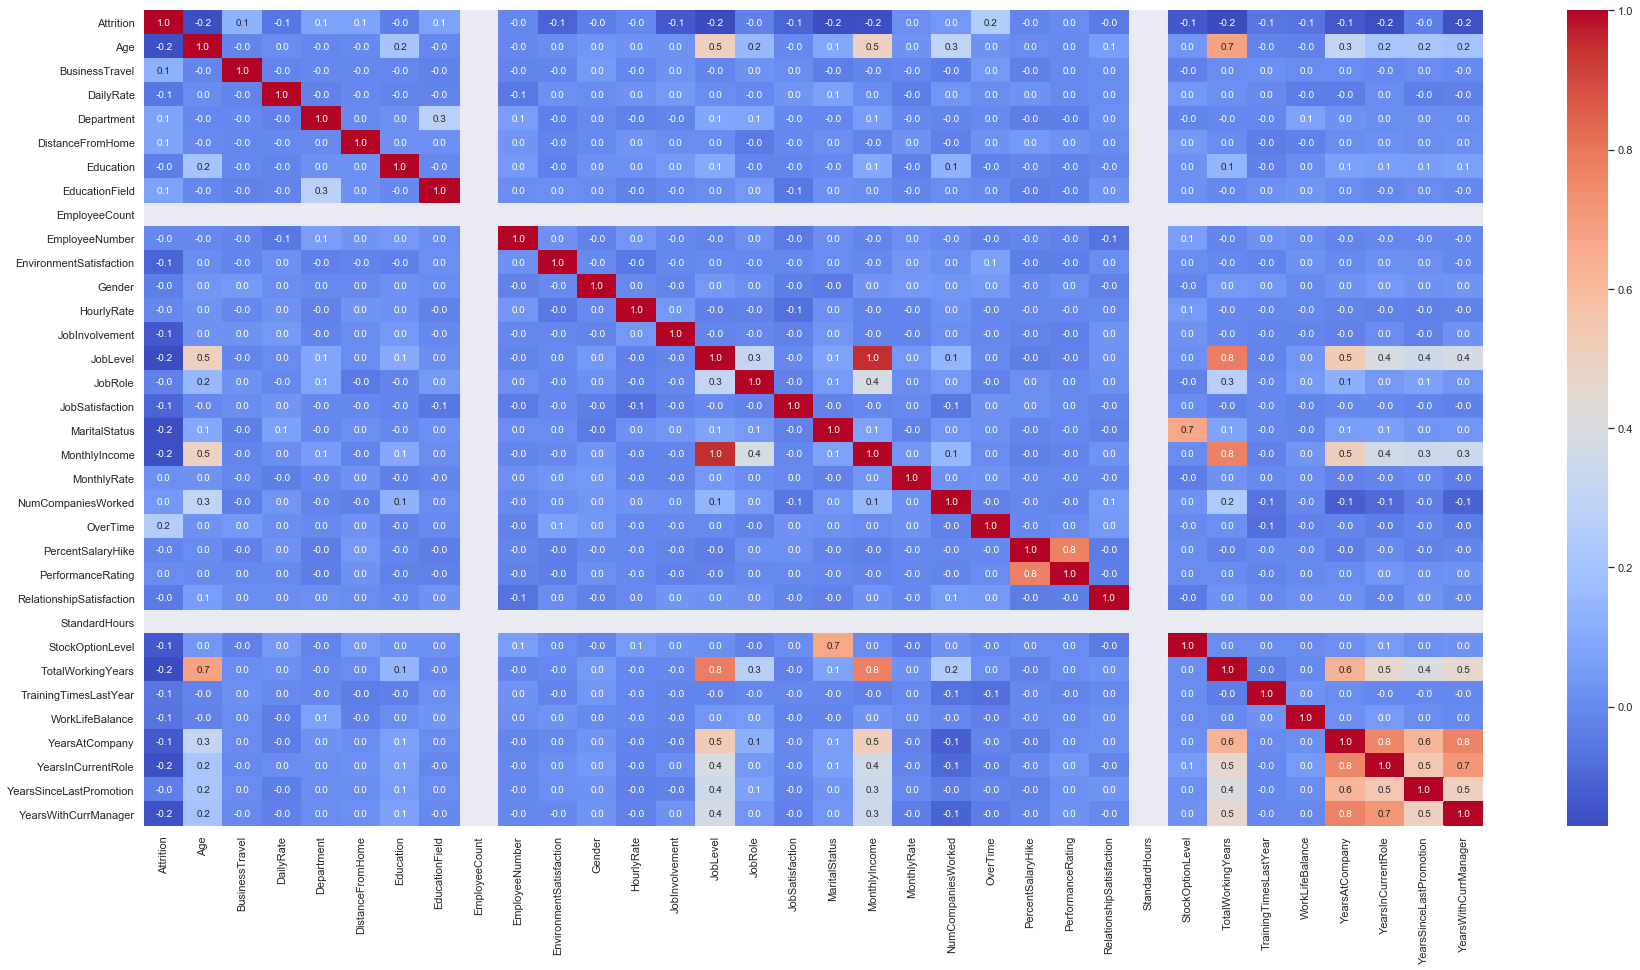

In [9]:
plt.subplots(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".1f")

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

#logisticregression
y= df['Attrition']
X= df[['MonthlyIncome','DailyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','Age','OverTime','DistanceFromHome']]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.3, random_state= 2)
logmodel= LogisticRegression(max_iter= 10000)
logmodel.fit(X_train,y_train)

predictions= logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.75      0.17      0.28        71

    accuracy                           0.86       441
   macro avg       0.81      0.58      0.60       441
weighted avg       0.84      0.86      0.82       441

[[366   4]
 [ 59  12]]
0.8571428571428571


In [11]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [12]:
#the dataset is unbalaced as it has 1233 values fro class 1 and 237 values of class 2.
# lets try it with upsampling approach.
from sklearn.utils import resample
df_majority = df[df.Attrition==0]
df_minority = df[df.Attrition==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1233,    # to match majority class
                                 random_state=2) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Attrition.value_counts()
X_over= df_upsampled.drop('Attrition',axis=1)
y_over= df_upsampled['Attrition']
X_over_train,X_over_test,y_over_train,y_over_test= train_test_split(X_over,y_over,test_size= 0.3, random_state= 2)

logmodel= LogisticRegression(max_iter= 10000)
logmodel.fit(X_over_train,y_over_train)

predictions= logmodel.predict(X_over_test)
print(classification_report(y_over_test, predictions))
print(confusion_matrix(y_over_test, predictions))
print(accuracy_score(y_over_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       366
           1       0.75      0.75      0.75       374

    accuracy                           0.74       740
   macro avg       0.74      0.74      0.74       740
weighted avg       0.74      0.74      0.74       740

[[271  95]
 [ 94 280]]
0.7445945945945946


In [13]:
#we try logistic regression with cross validation
#on the upsampled data , logistic regression with cross validation gives a value of 0.77 percent.
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_val_predict,validation_curve
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver= 'lbfgs',max_iter=10000,random_state=2)
print(cross_val_score(logreg, X_over, y_over, cv=10, scoring='accuracy').mean())


0.770873243145387


In [14]:
#lets try it with random forest classifier

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state =2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.8458049886621315
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       370
           1       0.54      0.28      0.37        71

    accuracy                           0.85       441
   macro avg       0.71      0.62      0.64       441
weighted avg       0.82      0.85      0.82       441



In [15]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state =2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_over_train,y_over_train)

y_pred=clf.predict(X_over_test)

print(accuracy_score(y_over_test, y_pred))
print(classification_report(y_over_test,y_pred))

0.977027027027027
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       366
           1       0.96      1.00      0.98       374

    accuracy                           0.98       740
   macro avg       0.98      0.98      0.98       740
weighted avg       0.98      0.98      0.98       740



Random forest classifier gives a value of-
0.85 accuracy for original dataset
0.98 accuracy for upsampled dataset

In [16]:
from sklearn import linear_model

#using sgd classifier
sgd_classifier=linear_model.SGDClassifier(max_iter=10000,loss='log',penalty='l2',random_state=2)
scores=cross_val_score(sgd_classifier,X_train,y_train,cv= 10)
print ("l2 REGULARIZED LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER\n")
print ("Cross Validation Scores on the training set: ", scores)

sgd_classifier.fit(X_train,y_train)
y_test_pred = sgd_classifier.predict(X_test)

print(classification_report(y_test, y_test_pred))
print( accuracy_score(y_test,y_test_pred))

l2 REGULARIZED LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER

Cross Validation Scores on the training set:  [0.83495146 0.80582524 0.83495146 0.83495146 0.83495146 0.83495146
 0.15533981 0.84466019 0.74757282 0.84313725]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       370
           1       0.17      0.01      0.03        71

    accuracy                           0.83       441
   macro avg       0.50      0.50      0.47       441
weighted avg       0.73      0.83      0.77       441

0.8299319727891157


Training the model with sgd classifier gives us a value of 0.83 accuracy

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
clf = SVC(max_iter= 10000,random_state= 2)
clf.fit(X_over_train, y_over_train) 
pred= clf.predict(X_over_test)

print( accuracy_score(y_over_test,pred))
print(classification_report(y_over_test,pred))

0.6351351351351351
              precision    recall  f1-score   support

           0       0.65      0.57      0.61       366
           1       0.62      0.70      0.66       374

    accuracy                           0.64       740
   macro avg       0.64      0.63      0.63       740
weighted avg       0.64      0.64      0.63       740



In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, max_iter= 10000,random_state=2).fit(X_train, y_train)
pred=clf.predict(X_test)

print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8412698412698413
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       370
           1       0.57      0.06      0.10        71

    accuracy                           0.84       441
   macro avg       0.71      0.52      0.51       441
weighted avg       0.80      0.84      0.78       441



In [19]:
clf = LogisticRegressionCV(cv=10, max_iter= 10000,random_state=2).fit(X_over_train, y_over_train)
pred=clf.predict(X_over_test)

print(accuracy_score(y_over_test,pred))
print(classification_report(y_over_test,pred))

0.7405405405405405
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       366
           1       0.74      0.74      0.74       374

    accuracy                           0.74       740
   macro avg       0.74      0.74      0.74       740
weighted avg       0.74      0.74      0.74       740



In [20]:
#using vanilla decision tree
#in this i included all the features to know there significance using this method.
from sklearn.tree import DecisionTreeClassifier

a= df['Attrition']
b= df.drop('Attrition',axis=1)
b_train,b_test,a_train,a_test= train_test_split(b,a,test_size= 0.3, random_state= 2)

features= ['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
def features_rank(feature_importance_coefficients,index_labels):
    feature_importance_coefficients=map(abs,feature_importance_coefficients)
    feature_with_coeff=zip(feature_importance_coefficients,index_labels)
    print ("\nFeatures and their importances:\n", feature_with_coeff)
    ranked_features=sorted(feature_with_coeff, key=lambda x: x[0],reverse=True)
    print ("\nRanked Features:\n", [elem[1] for elem in ranked_features])
    
decision_tree=DecisionTreeClassifier()
scores=cross_val_score(decision_tree,b_train,a_train,cv=10)
print ("Cross Validation Scores on the training set: ", scores)

decision_tree=DecisionTreeClassifier(random_state=2).fit(b_train,a_train)
a_test_pred = decision_tree.predict(b_test)
print(classification_report(a_test,a_test_pred))
print(accuracy_score(a_test,a_test_pred))

coeff_list=decision_tree.feature_importances_
features_rank(coeff_list,features)

Cross Validation Scores on the training set:  [0.76699029 0.77669903 0.78640777 0.75728155 0.73786408 0.81553398
 0.80582524 0.78640777 0.77669903 0.83333333]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       370
           1       0.33      0.34      0.34        71

    accuracy                           0.78       441
   macro avg       0.60      0.60      0.60       441
weighted avg       0.79      0.78      0.79       441

0.7845804988662132

Features and their importances:

Ranked Features:
 ['MonthlyIncome', 'DailyRate', 'HourlyRate', 'StockOptionLevel', 'Over18', 'EmployeeNumber', 'OverTime', 'WorkLifeBalance', 'MonthlyRate', 'JobRole', 'PerformanceRating', 'Education', 'TrainingTimesLastYear', 'MaritalStatus', 'Age', 'DistanceFromHome', 'NumCompaniesWorked', 'StandardHours', 'EnvironmentSatisfaction', 'BusinessTravel', 'JobSatisfaction', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'PercentSalaryHik

In [21]:
#this is the vanilla decision tree on the upsampled dataset 
# i hv included only those features which showed high significance in chi2 test.
all_features= ['MonthlyIncome','DailyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','Age','OverTime','DistanceFromHome']
decision_tree=DecisionTreeClassifier()
scores=cross_val_score(decision_tree,X_over_train,y_over_train,cv=10)
print ("Cross Validation Scores on the training set: ", scores)

decision_tree=DecisionTreeClassifier(random_state=2).fit(X_over_train,y_over_train)
X_over_pred = decision_tree.predict(X_over_test)
print(classification_report(y_over_test,X_over_pred))
print(accuracy_score(y_over_test,X_over_pred))

coeff_list=decision_tree.feature_importances_
features_rank(coeff_list,all_features)

Cross Validation Scores on the training set:  [0.92485549 0.93063584 0.85549133 0.88439306 0.9132948  0.91907514
 0.91860465 0.87790698 0.9244186  0.95348837]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       366
           1       0.87      1.00      0.93       374

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.93      0.92      0.92       740

0.9216216216216216

Features and their importances:

Ranked Features:
 ['MonthlyIncome', 'TotalWorkingYears', 'DistanceFromHome', 'YearsInCurrentRole', 'DailyRate', 'Age', 'YearsWithCurrManager', 'YearsAtCompany', 'OverTime']


using vanilla decision tree we get -
0.78 accuracy - on unbalanced dataset
0.92 accuracy - on the upsampled dataset